In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn imbalanced-learn


Load the Data

In [2]:
import pandas as pd
data = pd.read_csv('/content/PS_20174392719_1491204439457_log.csv')
data = data.head(100)

Data Overview

In [3]:
print(data.head())


   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [4]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            100 non-null    int64  
 1   type            100 non-null    object 
 2   amount          100 non-null    float64
 3   nameOrig        100 non-null    object 
 4   oldbalanceOrg   100 non-null    float64
 5   newbalanceOrig  100 non-null    float64
 6   nameDest        100 non-null    object 
 7   oldbalanceDest  100 non-null    float64
 8   newbalanceDest  100 non-null    float64
 9   isFraud         100 non-null    int64  
 10  isFlaggedFraud  100 non-null    int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 8.7+ KB
None


In [5]:
print(data.nunique())

step                1
type                4
amount             99
nameOrig          100
oldbalanceOrg      72
newbalanceOrig     46
nameDest           89
oldbalanceDest     44
newbalanceDest     21
isFraud             2
isFlaggedFraud      1
dtype: int64


Summary Statistics

In [6]:
print(data.describe())



        step        amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
count  100.0  1.000000e+02     100.000000      100.000000    1.000000e+02   
mean     1.0  1.164494e+05   55956.578600    49777.028000    1.963171e+05   
std      0.0  2.983033e+05  143479.750518   142049.823665    6.718021e+05   
min      1.0  3.866000e+01       0.000000        0.000000    0.000000e+00   
25%      1.0  3.452790e+03       0.000000        0.000000    0.000000e+00   
50%      1.0  7.615625e+03    6808.500000        0.000000    0.000000e+00   
75%      1.0  5.836812e+04   28285.057500    20101.487500    5.403942e+04   
max      1.0  1.724887e+06  882770.000000   874042.260000    5.195482e+06   

       newbalanceDest     isFraud  isFlaggedFraud  
count    1.000000e+02  100.000000           100.0  
mean     1.212566e+06    0.020000             0.0  
std      4.262368e+06    0.140705             0.0  
min      0.000000e+00    0.000000             0.0  
25%      0.000000e+00    0.000000             

Exploratory Data Analysis

Distribution of Transaction Types

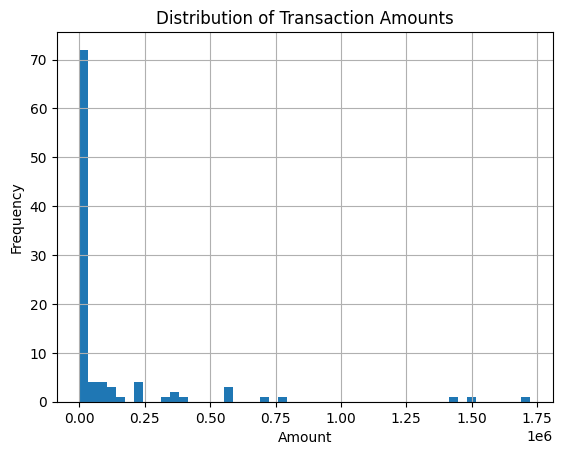

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


# Histograms
data['amount'].hist(bins=50)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()




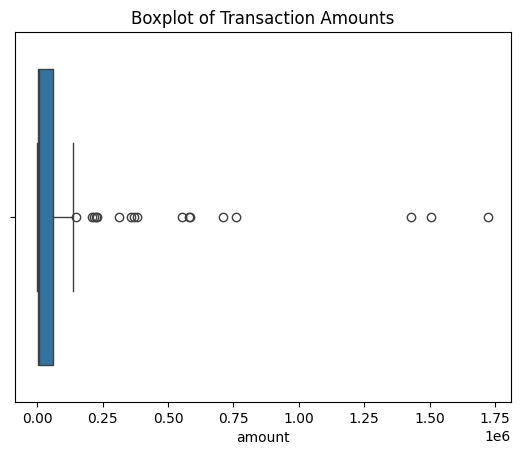

In [8]:
# Boxplot for transaction amounts
sns.boxplot(x=data['amount'])
plt.title('Boxplot of Transaction Amounts')
plt.show()

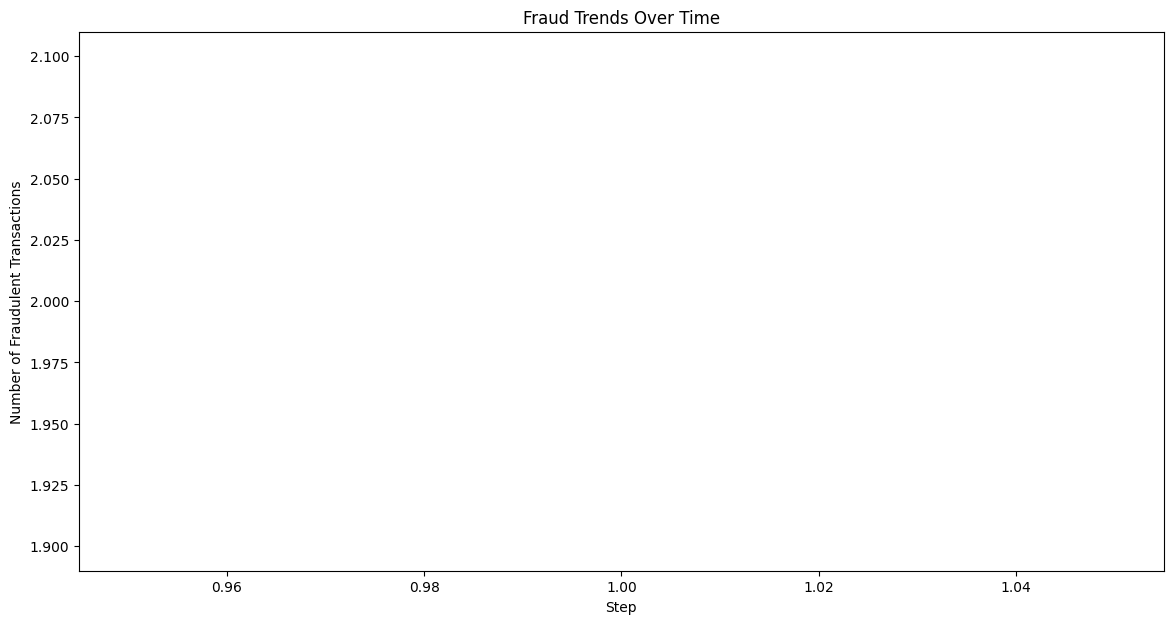

In [9]:
# Group data by 'step' and count unique occurrences of fraud
step_fraud_trends = data.groupby('step')['isFraud'].sum()
plt.figure(figsize=(14, 7))
step_fraud_trends.plot()
plt.title('Fraud Trends Over Time')
plt.xlabel('Step')
plt.ylabel('Number of Fraudulent Transactions')
plt.show()


Transaction Amounts and Balances

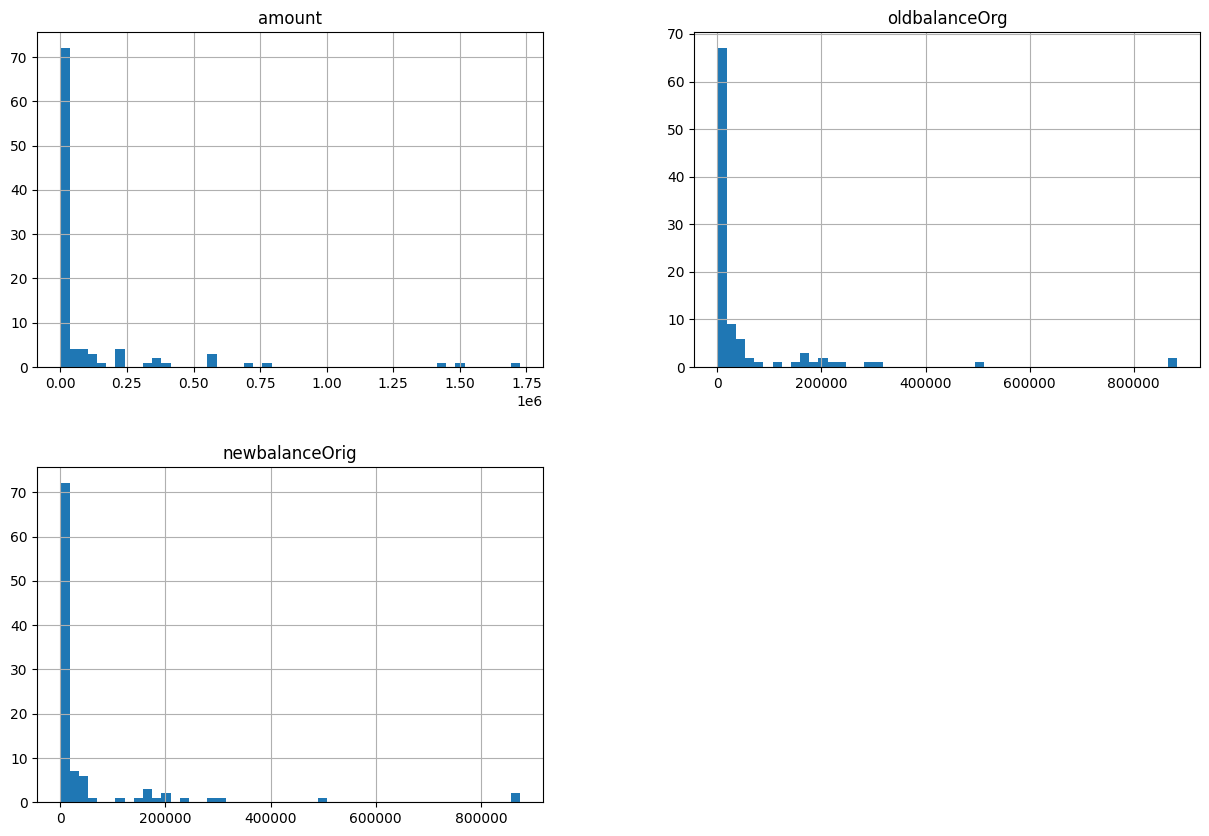

In [10]:
data[['amount', 'oldbalanceOrg', 'newbalanceOrig']].hist(bins=50, figsize=(15, 10))
plt.show()


Fraudulent Transactions Analysis

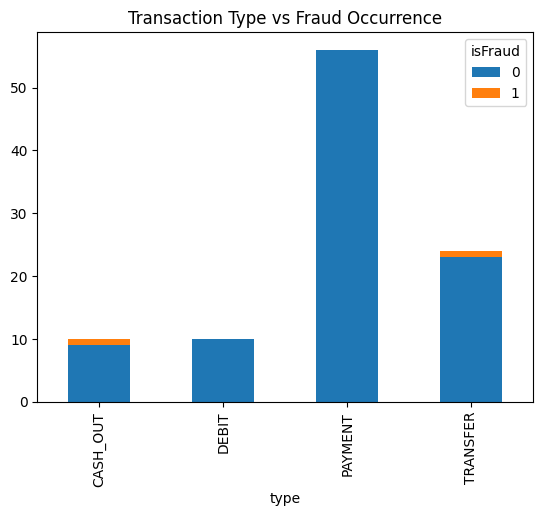

In [11]:
pd.crosstab(data['type'], data['isFraud']).plot(kind='bar', stacked=True)
plt.title('Transaction Type vs Fraud Occurrence')
plt.show()


Correlation Analysis

In [12]:
import pandas as pd

# Assuming 'data' is your DataFrame
data_encoded = pd.get_dummies(data, columns=['type'])
print(data_encoded.head())


   step    amount     nameOrig  oldbalanceOrg  newbalanceOrig     nameDest  \
0     1   9839.64  C1231006815       170136.0       160296.36  M1979787155   
1     1   1864.28  C1666544295        21249.0        19384.72  M2044282225   
2     1    181.00  C1305486145          181.0            0.00   C553264065   
3     1    181.00   C840083671          181.0            0.00    C38997010   
4     1  11668.14  C2048537720        41554.0        29885.86  M1230701703   

   oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  type_CASH_OUT  \
0             0.0             0.0        0               0          False   
1             0.0             0.0        0               0          False   
2             0.0             0.0        1               0          False   
3         21182.0             0.0        1               0           True   
4             0.0             0.0        0               0          False   

   type_DEBIT  type_PAYMENT  type_TRANSFER  
0       False          

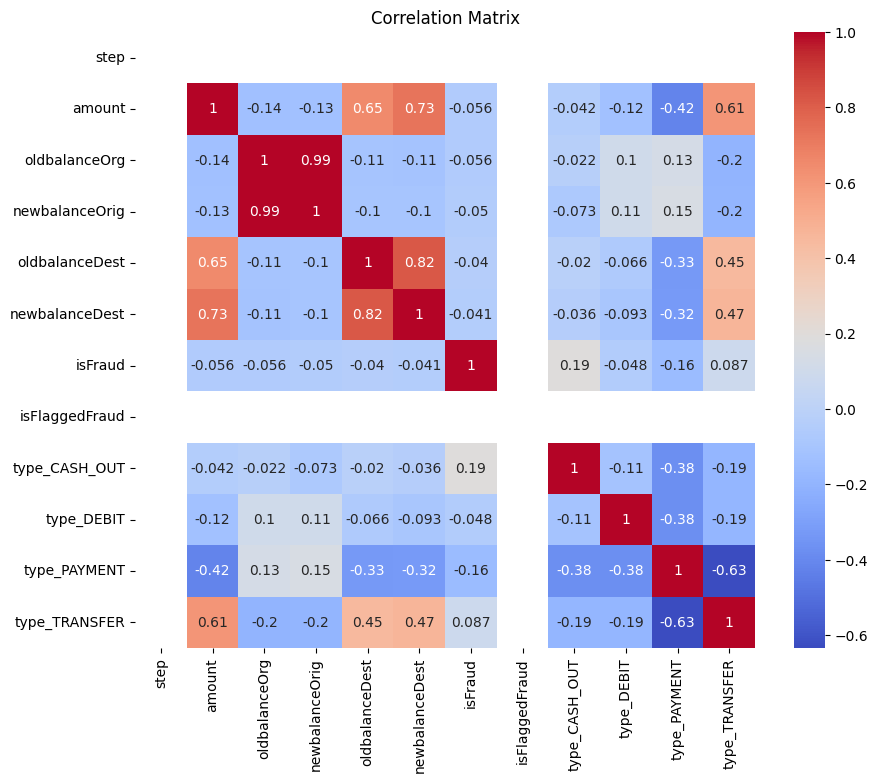

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
data_cleaned = data.drop(['nameOrig', 'nameDest'], axis=1)
data_encoded = pd.get_dummies(data_cleaned, columns=['type'])

plt.figure(figsize=(10, 8))
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



Data Preprocessing

Feature Engineering &Scaling Numerical Features

In [14]:
data = pd.get_dummies(data, columns=['type'])
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])


Data Preprocessing

Handle Missing Values, Encode Categorical Variables

In [15]:
# Remove non-informative columns (assuming 'nameOrig' and 'nameDest' are identifiers)
data.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

# Encoding categorical variables (if 'type' was not previously converted into dummies)
if 'type' in data.columns:
    data = pd.get_dummies(data, columns=['type'])

Feature Scaling

In [16]:
# Feature Scaling
scaler = StandardScaler()
numeric_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Step 5: Handling Class Imbalance with SMOTE
X = data.drop('isFraud', axis=1)
y = data['isFraud']


In [17]:
# Splitting the data into training and testing sets before applying SMOTE to avoid data leakage
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE only on training data
smote = SMOTE(random_state=42, k_neighbors=1)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# # Apply SMOTE to the training data to handle class imbalance
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Showing the balanced classes
print("Before SMOTE, counts of label '1': {}".format(sum(y_train == 1)))
print("Before SMOTE, counts of label '0': {} \n".format(sum(y_train == 0)))

print("After SMOTE, counts of label '1': {}".format(sum(y_train_resampled == 1)))
print("After SMOTE, counts of label '0': {}".format(sum(y_train_resampled == 0)))

Before SMOTE, counts of label '1': 2
Before SMOTE, counts of label '0': 78 

After SMOTE, counts of label '1': 78
After SMOTE, counts of label '0': 78


In [18]:
# Feature selection using RandomForest
from  sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report, roc_auc_score
selector = SelectFromModel(RandomForestClassifier(n_estimators=5, random_state=42, n_jobs=-1))
selector.fit(X_train_resampled, y_train_resampled)

# Transform both training and test datasets to only include important features
X_train_selected = selector.transform(X_train_resampled)
X_test_selected = selector.transform(X_test)

# Train the RandomForestClassifier with selected features
model = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_leaf=10, random_state=42, n_jobs=-1)
model.fit(X_train_selected, y_train_resampled)

# Predict and evaluate the model
y_pred = model.predict(X_test_selected)
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test_selected)[:, 1]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

ROC AUC Score: nan


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:375: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


Feature Selection

Model Building and Training & Evaluate the Model

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Feature selection using RandomForest
selector = SelectFromModel(RandomForestClassifier(n_estimators=5, random_state=42, n_jobs=-1))
selector.fit(X_train_resampled, y_train_resampled)

# Transform both training and test datasets to only include important features
X_train_selected = selector.transform(X_train_resampled)
X_test_selected = selector.transform(X_test)  # This is the step that seems to be missing in your trace

# Initialize and train the RandomForestClassifier with selected features
model = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_leaf=10, random_state=42, n_jobs=-1)
model.fit(X_train_selected, y_train_resampled)

# Predicting the test set results and calculating the performance
y_pred = model.predict(X_test_selected)
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test_selected)[:, 1]))

# Additionally, ensure to adjust any PCA or other transformations accordingly

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

ROC AUC Score: nan


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:375: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


In [20]:
# Reduce the dataset randomly for feature selection
import numpy as np
sample_index = np.random.choice(X_train_resampled.index, size=int(len(X_train_resampled) * 0.1), replace=False)
X_sample = X_train_resampled.loc[sample_index]
y_sample = y_train_resampled[sample_index]

selector = SelectFromModel(RandomForestClassifier(n_estimators=5, random_state=42, n_jobs=-1))
selector.fit(X_sample, y_sample)


SelectFromModel(estimator=RandomForestClassifier(n_estimators=5, n_jobs=-1,
                                                 random_state=42))

In [21]:
from sklearn.decomposition import PCA

# Reduce dimensions using PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train_resampled)
X_test_pca = pca.transform(X_test)

selector.fit(X_train_pca, y_train_resampled)


SelectFromModel(estimator=RandomForestClassifier(n_estimators=5, n_jobs=-1,
                                                 random_state=42))

In [22]:
selector = SelectFromModel(RandomForestClassifier(n_estimators=5, min_samples_leaf=50, max_depth=5, random_state=42, n_jobs=-1))
selector.fit(X_train_resampled, y_train_resampled)


selector = SelectFromModel(RandomForestClassifier(n_estimators=5, random_state=42, n_jobs=2))
selector.fit(X_train_resampled, y_train_resampled)


SelectFromModel(estimator=RandomForestClassifier(n_estimators=5, n_jobs=2,
                                                 random_state=42))

In [23]:
y_pred = model.predict(X_test_selected)


In [25]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Train the model on the resampled training data
gb_model.fit(X_train_selected, y_train_resampled)


GradientBoostingClassifier(max_depth=5, random_state=42)

In [26]:
# Making predictions on the test set
gb_y_pred = gb_model.predict(X_test_selected)

# Evaluating the model
from sklearn.metrics import classification_report, roc_auc_score

print("Gradient Boosting Classifier Report:")
print(classification_report(y_test, gb_y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, gb_model.predict_proba(X_test_selected)[:, 1]))


Gradient Boosting Classifier Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

ROC AUC Score: nan


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:375: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


In [27]:
# Random Forest performance was already printed earlier
print("Random Forest Classifier Report:")
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test_selected)[:, 1]))

# Reprint Gradient Boosting results for comparison
print("Gradient Boosting Classifier Report:")
print(classification_report(y_test, gb_y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, gb_model.predict_proba(X_test_selected)[:, 1]))


Random Forest Classifier Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

ROC AUC Score: nan
Gradient Boosting Classifier Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

ROC AUC Score: nan


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:375: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:375: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1180: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1180: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


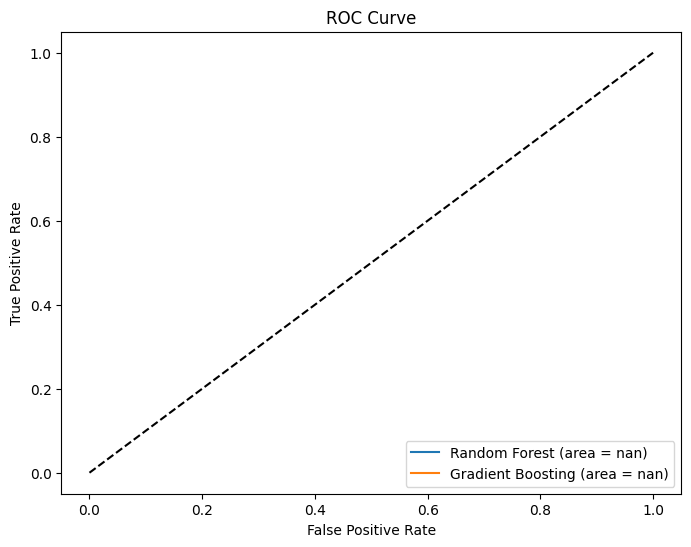

In [28]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve from both models
rf_fpr, rf_tpr, _ = roc_curve(y_test, model.predict_proba(X_test_selected)[:, 1])
rf_auc = auc(rf_fpr, rf_tpr)

gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_model.predict_proba(X_test_selected)[:, 1])
gb_auc = auc(gb_fpr, gb_tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_auc)
plt.plot(gb_fpr, gb_tpr, label='Gradient Boosting (area = %0.2f)' % gb_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1027: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1027: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1027: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1027: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


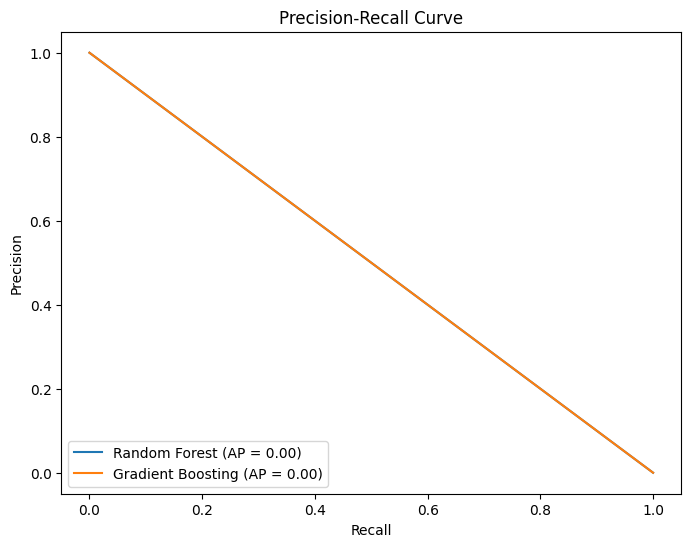

In [29]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Calculate precision-recall curve
rf_precision, rf_recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test_selected)[:, 1])
rf_ap = average_precision_score(y_test, model.predict_proba(X_test_selected)[:, 1])

gb_precision, gb_recall, _ = precision_recall_curve(y_test, gb_model.predict_proba(X_test_selected)[:, 1])
gb_ap = average_precision_score(y_test, gb_model.predict_proba(X_test_selected)[:, 1])

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(rf_recall, rf_precision, label='Random Forest (AP = %0.2f)' % rf_ap)
plt.plot(gb_recall, gb_precision, label='Gradient Boosting (AP = %0.2f)' % gb_ap)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()
